## 기술 통계와 모델링_1
<br>
<br>

#### 와인 품질 데이터 분석

> 참고 : 파이썬 데이터 분석입문 -클린턴 브라운리 지음, 한빛미디어 <br>
> 데이터셋 : https://github.com/cbrownley/foundations-for-analytics-with-python -> winequality-both.csv <br>

<br>

* <b> DataSet 명세 </b> 
> 레드 와인과 화이트 와인으로 구성 (* 포르투칼산 '비뉴베르드' 포함) <br>
> 레드와인은 1599개의 관측값(observation), 화이트 와인은 4,898개의 관측값 포함 <br>
> 11개의 '입력변수'와 1개의 '출력변수'로 구성 <br>
> 출력 변수 quality의 경우 변수로서 0점에서 10점(가장높은품질) 사이의 점수를 갖음 <br>
> 입력변수는 결합산(고정산),휘발산,구연산,잔여설탕,염화물,이산화황(무수아황산),총이산화황,밀도,산성도,황산염,알코올 도수

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import tmean, scoreatpercentile
import seaborn as sns
import os
import numpy as np
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
import scipy.stats

In [62]:
wine = pd.read_csv('C:/Users/KIHyuk/Documents/GitHub/Jupyter_Repo/Data/winequality-both.csv',sep=',',header=0) # 필드 구분기호(,), 열 헤더를 파일 첫행으로 지정

In [64]:
wine.columns = wine.columns.str.replace(" ","_") ## 공백을 _ 로 변환하는거임 바꾸려는 문자열에 반드시 공백줘야함

<br>
* 변수별 요약통계 표시

In [66]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [67]:
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

<br>
* 출력 변수인 품질 평가점수(quality) 유일값 찾기

In [68]:
sorted(wine.quality.unique()) # 오름차순 지정

[3, 4, 5, 6, 7, 8, 9]

<br>
* 품질 평가점수 빈도계산

In [69]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<br>
* 와인 종류별 그룹화

In [70]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


<br>
* 특정 사분위수 계산

In [71]:
wine.groupby('type')['quality'].quantile([0.25,0.75]).unstack('type') ## unstack => 결과를 가로방향으로 재구조화

type,red,white
0.25,5.0,5.0
0.75,6.0,6.0


<br>
* 와인 종류에 따른 품질 분포 확인

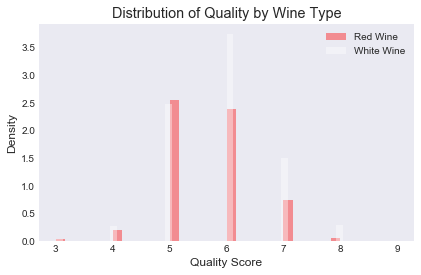

In [72]:
red_wine = wine.ix[wine['type']=='red','quality']  # ix 인덱싱 (integer와 label 동시사용 인덱싱)
white_wine = wine.ix[wine['type']=='white','quality'] # ix['row 조건 지정', ' column 지정']

# seaborn 패키지
sns.set_style('dark')    # set_style은 틱 스타일만 변경 가능
# norm_hist가 True이면 히스토그램 높이수가 아닌 밀도분포, kde:커널밀도 표시여부 
sns.distplot(red_wine, norm_hist=True, kde=False, color='red', label='Red Wine')  # 두 그룹(와인 종류별)의 관측갯수가 다르므로 빈도분포 대신 밀도분포 사용
sns.distplot(white_wine, norm_hist=True, kde=False, color='white', label='White Wine')
sns.utils.axlabel('Quality Score', 'Density')

plt.title('Distribution of Quality by Wine Type')
plt.legend()
plt.show()

In [73]:
## 와인 종류에 따른 품질의 차이가 통계적으로 유의한지 알기 위한 t-test

import statsmodels.api as sm

print(wine.groupby('type')['quality'].agg(['std','mean'])) # 그룹별 품질의 평균,표준편차

print("")

tstat,pvalue,df = sm.stats.ttest_ind(red_wine,white_wine)
print('tstat: %.3f pvalue: %.4f' % (tstat,pvalue)) 


            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909

tstat: -9.686 pvalue: 0.0000


<br>
> 두 샘플이 독립이고, 히스토그램과 개수(30개 이상)가 정규성을 충족하며, 표준편차가 작으므로 등분산성을 충족한다고 본다.

>  t검정 결과, p값은 0.0000으로 통상적인 유의수준보다 훨씬 작으므로 두 그룹 간의 품질 차이가 통계적으로 유의하다고 본다.

<br>
* 상관관계 분석

In [74]:
# 모든 변수 쌍 사이의 상관계수 파악
#wine.corr()

<br>
* 표본 추출

In [75]:
# 표본 추출 함수
def take_sample(data_frame, replace=False, n=200):
    return data_frame.loc[np.random.choice(data_frame.index,replace=replace,size=n)]

reds_sample = take_sample(wine.loc[wine['type']=='red',:])
whites_sample = take_sample(wine.loc[wine['type']=='white',:])

# 와인 데이터프레임의 인덱스 값이 wine_sample 데이터프레임의 인덱스값과 일치하는지에 따라 in_sample 열을 1,0으로 채움
wine_sample = pd.concat([reds_sample, whites_sample]) # red,white 샘플 다시 합침
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index),1.,0.)

# crosstab() : array형식의 데이터를 컬럼과 열의 인자로 받아 서로 몇개의 일치값이 있는가를 확인할 수 있음
print(pd.crosstab(wine.in_sample, wine.type, margins=True)) 

type        red  white   All
in_sample                   
0.0        1399   4698  6097
1.0         200    200   400
All        1599   4898  6497


* 산점도 행렬
<br>

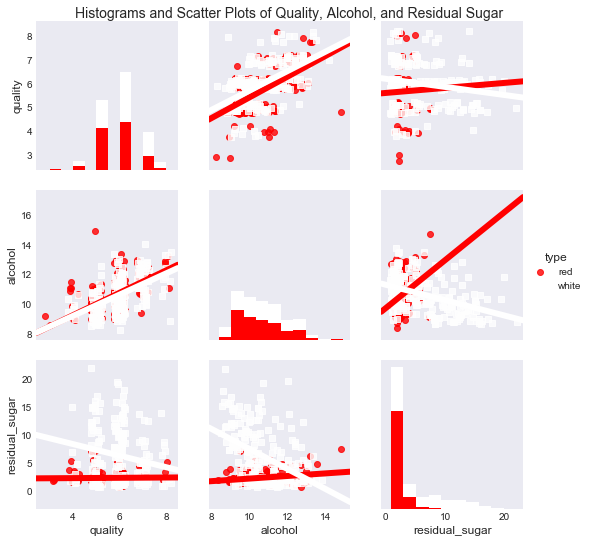

In [77]:
sns.set_style("dark")

# pairplot => 산점도 행렬
g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci":False, "x_jitter":0.25, "y_jitter":0.25},
                hue='type', diag_kind='hist', diag_kws={'bins':10, "alpha":1.0}, palette=dict(red="red",white="white"),
                 markers=['o','s'], vars=['quality','alcohol','residual_sugar'])

print(g)
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual Sugar',fontsize=14,
            horizontalalignment='center', verticalalignment='top', x=0.5, y=0.999)

plt.show()

* <b> 최소제곱법을 이용한 선형회귀분석 </b>

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 회귀분석 code // 종속변수 ~ 독립변수1+독립변수2 .... 
my_formula = 'quality ~ alcohol+chlorides+citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'

## ols => 최소제곱법
lm = smf.ols(my_formula, data=wine).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:45:04   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'in_sample'],
      dtype='object')